In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
hdul1 = fits.open('275.fits')
hdul2 = fits.open('336.fits')
hdul3 = fits.open('438.fits')
hdul4 = fits.open('555.fits')
hdul5 = fits.open('814.fits')

In [3]:
hdul5[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                12000                                                  
NAXIS2  =                12000                                                  
EXTEND  =                    T                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
FILENAME= 'ngc4303_uvis_f814w_exp_drc_sci.fits' / name of file                  
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'WFC3  '          

In [4]:
image1=hdul1[0].data
image2=hdul2[0].data
image3=hdul3[0].data
image4=hdul4[0].data
image5=hdul5[0].data

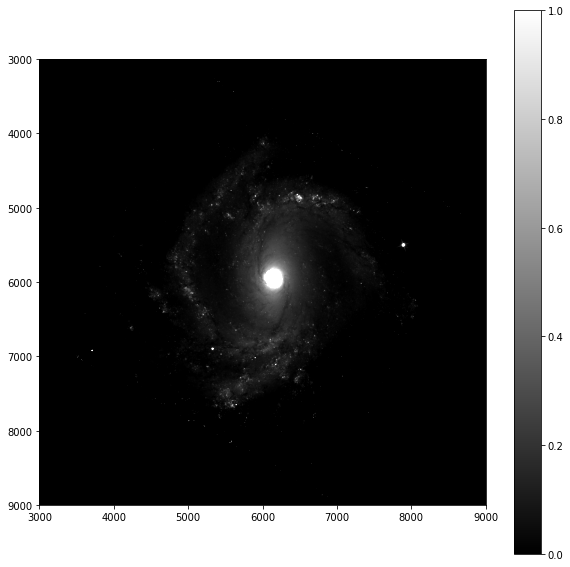

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(image5,vmin=0,vmax=1, cmap='gray')
plt.colorbar()
plt.xlim(3000,9000)
plt.ylim(9000,3000)
plt.savefig('imag5.png')
plt.show()

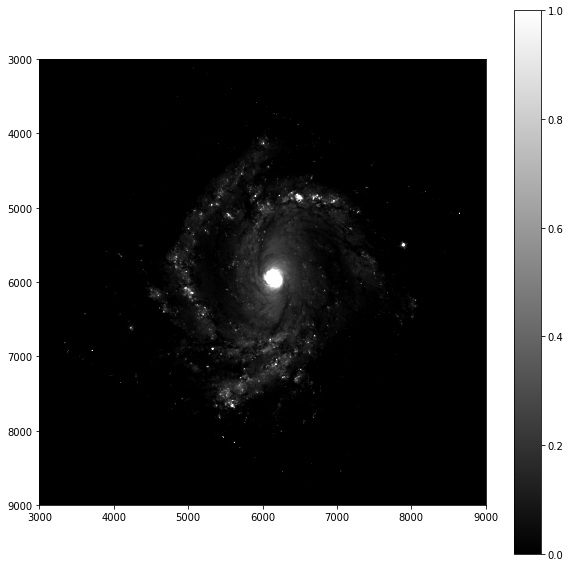

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(image4,vmin=0,vmax=1, cmap='gray')
plt.colorbar()
plt.xlim(3000,9000)
plt.ylim(9000,3000)
plt.savefig('imag4.png')
plt.show()

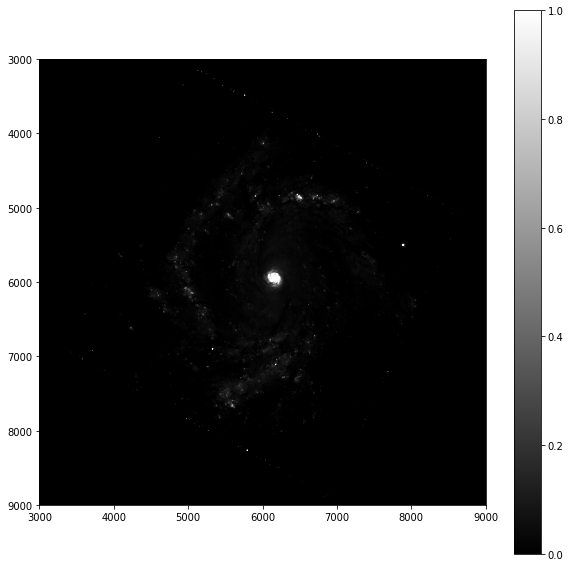

In [25]:
plt.figure(figsize=(10,10))
plt.imshow(image3,vmin=0,vmax=1, cmap='gray')
plt.colorbar()
plt.xlim(3000,9000)
plt.ylim(9000,3000)
plt.savefig('imag3.png')
plt.show()

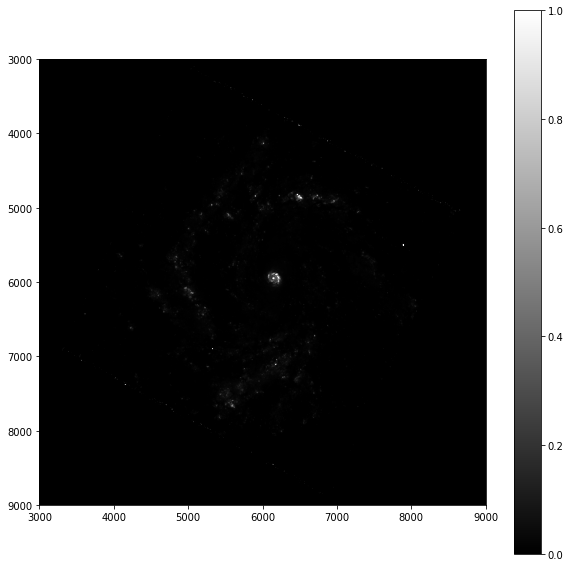

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(image2,vmin=0,vmax=1, cmap='gray')
plt.colorbar()
plt.xlim(3000,9000)
plt.ylim(9000,3000)
plt.savefig('imag2.png')
plt.show()

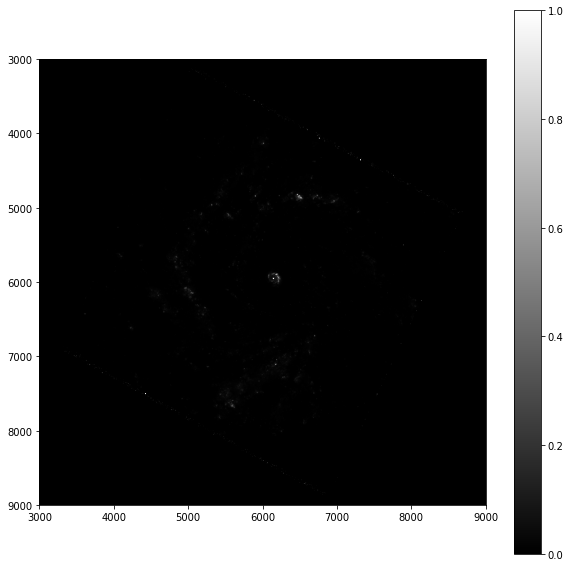

In [27]:
plt.figure(figsize=(10,10))
plt.imshow(image1,vmin=0,vmax=1, cmap='gray')
plt.colorbar()
plt.xlim(3000,9000)
plt.ylim(9000,3000)
plt.savefig('imag1.png')
plt.show()

In [6]:
from PIL import Image

def convert_grayscale_to_rgb(grayscale_images):
    """
    Convert a list of grayscale images to a single RGB image.

    Args:
        grayscale_images (list[PIL.Image]): List of grayscale images.

    Returns:
        PIL.Image: The resulting RGB image.

    Raises:
        ValueError: If the input list does not contain exactly 5 images.
    """
    # Convert list of grayscale images to numpy arrays
    grayscale_arrays = [np.array(img) for img in grayscale_images]

    # Check if the input list contains exactly 5 images
    if len(grayscale_arrays) != 5:
        raise ValueError("Need exactly 5 grayscale images to form an RGB image")

    # Split the 5 images into 3 channels (RGB) and 2 extra channels
    rgb_channels = grayscale_arrays[:3]
    extra_channels = grayscale_arrays[3:]

    # Stack the RGB channels along the last dimension to form an RGB image
    rgb_array = np.stack(rgb_channels, axis=-1)
    
    # Convert back to PIL Image
    rgb_image = Image.fromarray(rgb_array.astype('uint8'))

    return rgb_image

# Example usage:
if __name__ == "__main__":
    # Load grayscale images
    gray_image1 = Image.open('imag5.png').convert('L')
    gray_image2 = Image.open('imag4.png').convert('L')
    gray_image3 = Image.open('imag3.png').convert('L')
    gray_image4 = Image.open('imag2.png').convert('L')
    gray_image5 = Image.open('imag1.png').convert('L')

    # Convert to RGB
    rgb_image = convert_grayscale_to_rgb([gray_image1, gray_image2, gray_image3, gray_image4, gray_image5])

    # Save or display the RGB image
    rgb_image.save('rgb_image.png')
    rgb_image.show()

In [7]:
from astropy.table import Table
import pandas as pd

In [8]:
data=Table.read('catalogs/hlsp_phangs-cat_hst_uvis_ngc4303_multi_v1_obs-human-cluster-class12.fits')
#data=Table.read('catalogs/hlsp_phangs-cat_hst_uvis_ngc4303_multi_v1_obs-machine-cluster-class12.fits')
cluster_data=data.to_pandas()
print(cluster_data)
cluster_data.to_excel('cluster_data.xlsx', index=False)

     INDEX  ID_PHANGS_CLUSTER  ID_PHANGS_CANDIDATE  ID_PHANGS_ALLSOURCES  \
0        1                 10                   32                  3337   
1        2                 12                   38                   743   
2        3                 46                  112                  1971   
3        4                 49                  116                   384   
4        5                 65                  140                  3665   
..     ...                ...                  ...                   ...   
552    553               5653                 9846                   306   
553    554               5656                 9855                  1516   
554    555               5668                 9882                  2437   
555    556               5701                 9954                  3381   
556    557               5703                 9967                   594   

     PHANGS_X  PHANGS_Y   PHANGS_RA  PHANGS_DEC  PHANGS_CLUSTER_CLASS_HUMAN  \
0     56

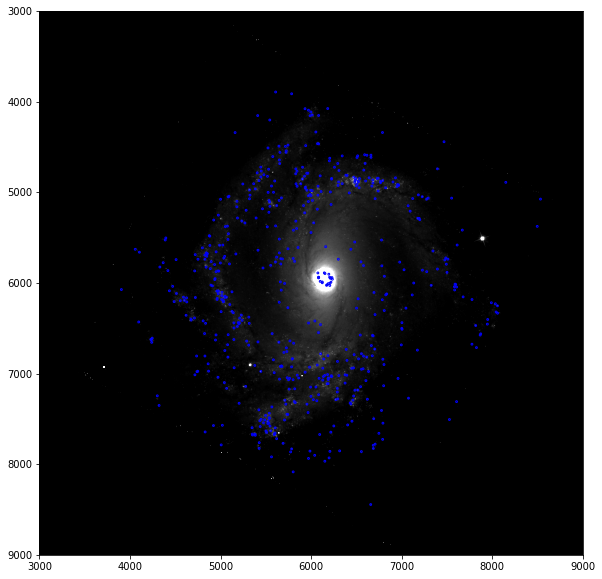

In [9]:
# Extract header values from hdul5
main_ra, main_dec = hdul5[0].header['CRVAL1'], hdul5[0].header['CRVAL2']
error_ra, error_dec = hdul5[0].header['CD1_1'], hdul5[0].header['CD2_2']
pixel1, pixel2 = hdul5[0].header['CRPIX1'], hdul5[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(cluster_data.PHANGS_RA), np.array(cluster_data.PHANGS_DEC)

# Calculate pixel coordinates
p1_814 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_814 = pixel2 + (cluster_dec - main_dec) / error_dec
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image5, vmin=0, vmax=1, cmap='gray')
ax.set_xlim(3000,9000)
ax.set_ylim(9000,3000)
# Add circles to the plot
for x, y in zip(p1_814,p2_814):
    circle = plt.Circle((x, y), radius=10, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.show()

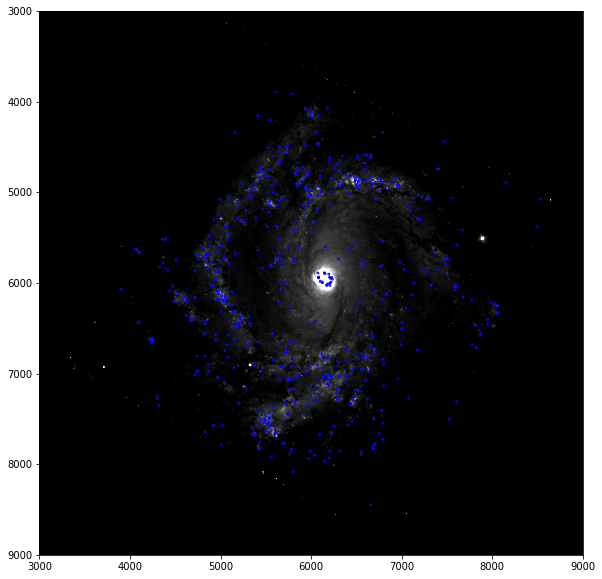

In [10]:
#Extract header values from hdul4
main_ra, main_dec = hdul4[0].header['CRVAL1'], hdul4[0].header['CRVAL2']
error_ra, error_dec = hdul4[0].header['CD1_1'], hdul4[0].header['CD2_2']
pixel1, pixel2 = hdul4[0].header['CRPIX1'], hdul4[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(cluster_data.PHANGS_RA), np.array(cluster_data.PHANGS_DEC)

# Calculate pixel coordinates
p1_555 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_555 = pixel2 + (cluster_dec - main_dec) / error_dec
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image4, vmin=0, vmax=1, cmap='gray')
ax.set_xlim(3000,9000)
ax.set_ylim(9000,3000)

# Add circles to the plot
for x, y in zip(p1_555,p2_555):
    circle = plt.Circle((x, y), radius=10, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.show()

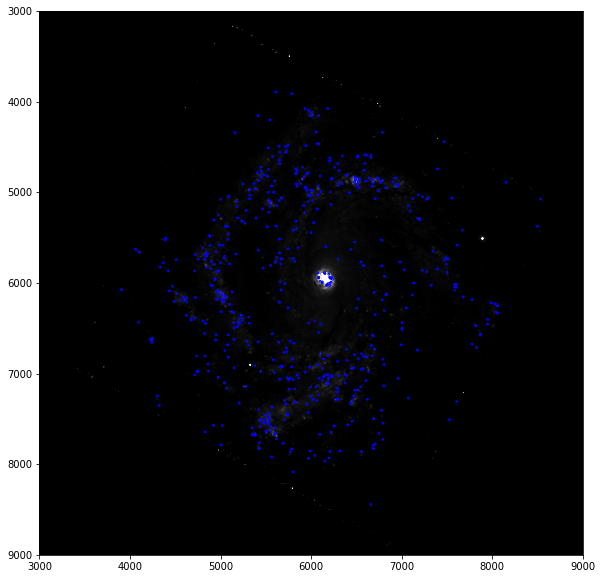

In [11]:
#Extract header values from hdul3
main_ra, main_dec = hdul3[0].header['CRVAL1'], hdul3[0].header['CRVAL2']
error_ra, error_dec = hdul3[0].header['CD1_1'], hdul3[0].header['CD2_2']
pixel1, pixel2 = hdul3[0].header['CRPIX1'], hdul3[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(cluster_data.PHANGS_RA), np.array(cluster_data.PHANGS_DEC)

# Calculate pixel coordinates
p1_438 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_438 = pixel2 + (cluster_dec - main_dec) / error_dec
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image3, vmin=0, vmax=1, cmap='gray')
ax.set_xlim(3000,9000)
ax.set_ylim(9000,3000)

# Add circles to the plot
for x, y in zip(p1_438,p2_438):
    circle = plt.Circle((x, y), radius=10, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.show()

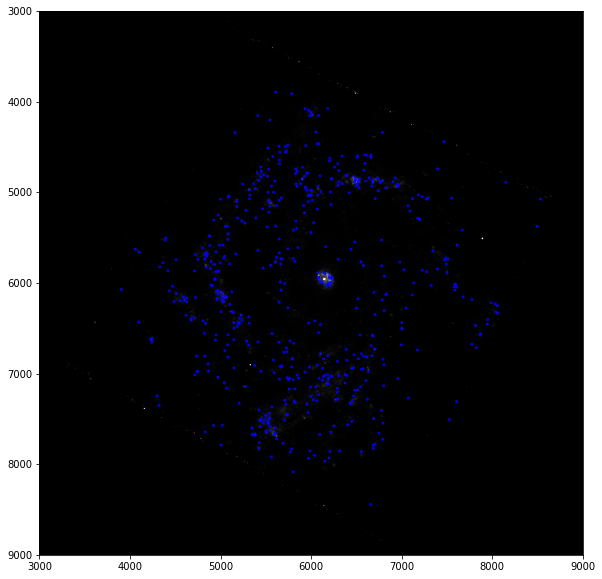

In [12]:
#Extract header values from hdul2
main_ra, main_dec = hdul2[0].header['CRVAL1'], hdul2[0].header['CRVAL2']
error_ra, error_dec = hdul2[0].header['CD1_1'], hdul2[0].header['CD2_2']
pixel1, pixel2 = hdul2[0].header['CRPIX1'], hdul2[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(cluster_data.PHANGS_RA), np.array(cluster_data.PHANGS_DEC)

# Calculate pixel coordinates
p1_336 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_336 = pixel2 + (cluster_dec - main_dec) / error_dec
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image2, vmin=0, vmax=1, cmap='gray')
ax.set_xlim(3000,9000)
ax.set_ylim(9000,3000)

# Add circles to the plot
for x, y in zip(p1_336,p2_336):
    circle = plt.Circle((x, y), radius=10, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.show()

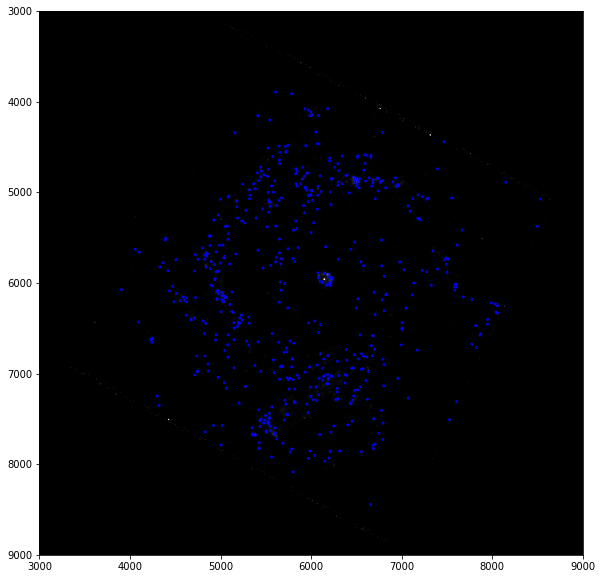

In [13]:
#Extract header values from hdul1
main_ra, main_dec = hdul1[0].header['CRVAL1'], hdul1[0].header['CRVAL2']
error_ra, error_dec = hdul1[0].header['CD1_1'], hdul1[0].header['CD2_2']
pixel1, pixel2 = hdul1[0].header['CRPIX1'], hdul1[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(cluster_data.PHANGS_RA), np.array(cluster_data.PHANGS_DEC)

# Calculate pixel coordinates
p1_275 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_275 = pixel2 + (cluster_dec - main_dec) / error_dec
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image1, vmin=0, vmax=1, cmap='gray')
ax.set_xlim(3000,9000)
ax.set_ylim(9000,3000)

# Add circles to the plot
for x, y in zip(p1_275,p2_275):
    circle = plt.Circle((x, y), radius=10, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.show()

In [14]:
from astropy.wcs import WCS

# Constants
R = 20 # radius of the star cluster in parsecs
D = 17.2e6  # distance to the galaxy in parsecs

# Calculate angular radius in radians
theta = R / D

# Convert angular radius to arcseconds
theta_arcsec = theta * (180 * 3600) / np.pi

#get pixel scale
wcs = WCS(hdul5[0].header)

# Assuming cdelt is in degrees/pixel, get pixel scale in arcseconds/pixel
cd = wcs.wcs.cd
# Pixel scale is the square root of the sum of squares of the CD matrix diagonal elements
pixel_scale = np.sqrt(cd[0, 0]**2 + cd[1, 1]**2) * 3600
# Convert angular radius to pixels
radius_pixels = theta_arcsec / pixel_scale

print(f"Radius of the aperture in pixels: {radius_pixels}")


Radius of the aperture in pixels: 4.28052672532827


In [15]:
from photutils.aperture import CircularAperture,CircularAnnulus,aperture_photometry,ApertureStats

In [16]:
def calculate_aperture_photometry(image, position, aperture_radius, annulus_radius):
    """
    Perform aperture photometry and subtract background.

    Parameters:
    image (array_like): Image data.
    position (tuple): (x, y) coordinates of the target pixel.
    aperture_radius (float): Radius of the circular aperture.
    annulus_radius (tuple): Inner and outer radii of the circular annulus.

    Returns:
    phot_table (Table): Table with aperture photometry results.
    """
    # Define the apertures
    aperture = CircularAperture(position, r=aperture_radius)
    annulus = CircularAnnulus(position, r_in=annulus_radius[0], r_out=annulus_radius[1])

    # Calculate the background statistics
    aper_stats = ApertureStats(image, annulus)
    bkg_mean = aper_stats.mean

    # Calculate the aperture area
    aperture_area = aperture.area_overlap(image)

    # Calculate the total background
    total_bkg = bkg_mean * aperture_area

    # Perform aperture photometry
    phot_table = aperture_photometry(image, aperture)

    # Subtract the background from the aperture sum
    phot_bkgsub = phot_table['aperture_sum'] - total_bkg

    # Add the background and background-subtracted columns to the table
    phot_table['total_bkg'] = total_bkg
    phot_table['aperture_sum_bkgsub'] = phot_bkgsub

    # Format the columns
    for col in phot_table.colnames:
        phot_table[col].info.format = '%8.g'

    return phot_table

In [17]:
# Create a list of positions from p1 and p2
positions_814 = list(zip(p1_814, p2_814))
positions_555 = list(zip(p1_555, p2_555))
positions_438 = list(zip(p1_438, p2_438))
positions_336 = list(zip(p1_336, p2_336))
positions_275 = list(zip(p1_275, p2_275))

phot_table_814 = calculate_aperture_photometry(image5,positions_814,4,(7,8))
phot_table_555= calculate_aperture_photometry(image4,positions_555,4,(7,8))
phot_table_438= calculate_aperture_photometry(image3,positions_438,4,(7,8))
phot_table_336= calculate_aperture_photometry(image2,positions_336,4,(7,8))
phot_table_275= calculate_aperture_photometry(image1,positions_275,4,(7,8))

# Print the table
#print(phot_table_814)

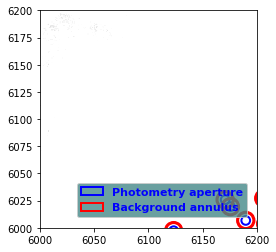

In [39]:
from astropy.visualization import simple_norm

# Define the aperture and annulus
aperture = CircularAperture(positions_814, r=4)
annulus_aperture = CircularAnnulus(positions_814, r_in=7, r_out=8)

# Define the image display settings
norm = simple_norm(image5, 'sqrt', percent=99)
cmap = 'gray'
interpolation = 'nearest'

# Create the figure and axis
fig, ax = plt.subplots()

# Display the image
ax.imshow(image4, norm=norm, interpolation=interpolation, cmap=cmap)

# Set the axis limits
ax.set_xlim(6000, 6200)
ax.set_ylim(6000, 6200)

# Plot the aperture and annulus
ap_patches = aperture.plot(color='blue', lw=2, label='Photometry aperture')
ann_patches = annulus_aperture.plot(color='red', lw=2, label='Background annulus')

# Create a legend
legend_handles = (ap_patches[0], ann_patches[0])
legend_kwargs = dict(loc=(0.17, 0.05), facecolor='#458989', labelcolor='blue',
                     handles=legend_handles, prop=dict(weight='bold', size=11))
ax.legend(**legend_kwargs)

# Show the plot
plt.show()

In [84]:
"""
import astropy.units as u
import astropy.io.ascii as ascii
from astropy.coordinates import SkyCoord
from astropy.stats import sigma_clip, sigma_clipped_stats
from astroquery.esasky import ESASky as esa
"""

'\nimport astropy.units as u\nimport astropy.io.ascii as ascii\nfrom astropy.coordinates import SkyCoord\nfrom astropy.stats import sigma_clip, sigma_clipped_stats\nfrom astroquery.esasky import ESASky as esa\n'

In [85]:
"""
# Extract header from HDU
header = hdul5[0].header

# Calculate center coordinates using WCS
centre_ra, centre_dec = wcs.all_pix2world(image5.shape[0] / 2, image5.shape[1] / 2, 1)

# Define constants
BOX_SIZE = 300  # arcsec

# Create SkyCoord object for query
position = SkyCoord(ra=centre_ra, dec=centre_dec, unit=(u.deg, u.deg))

# Query ESA catalogs
result = esa.query_region_catalogs(
    position=position,
    radius=2.5 * u.arcmin,
    catalogs="HSC",
    row_limit=40000
)
result[0]
"""

'\n# Extract header from HDU\nheader = hdul5[0].header\n\n# Calculate center coordinates using WCS\ncentre_ra, centre_dec = wcs.all_pix2world(image5.shape[0] / 2, image5.shape[1] / 2, 1)\n\n# Define constants\nBOX_SIZE = 300  # arcsec\n\n# Create SkyCoord object for query\nposition = SkyCoord(ra=centre_ra, dec=centre_dec, unit=(u.deg, u.deg))\n\n# Query ESA catalogs\nresult = esa.query_region_catalogs(\n    position=position,\n    radius=2.5 * u.arcmin,\n    catalogs="HSC",\n    row_limit=40000\n)\nresult[0]\n'

In [86]:
"""
MAX_MAG = 20 # magnitude
k = result[0].to_pandas()
k.to_excel('HSC.xlsx',index=False)
k.sort_values('flux', inplace=True)
k.reset_index(drop=True, inplace=True)
k[(k['filter']=='w2_f814w')]
"""

"\nMAX_MAG = 20 # magnitude\nk = result[0].to_pandas()\nk.to_excel('HSC.xlsx',index=False)\nk.sort_values('flux', inplace=True)\nk.reset_index(drop=True, inplace=True)\nk[(k['filter']=='w2_f814w')]\n"

In [87]:
"""
# Extract values from k and hdul5
target_ra, target_dec, target_mag = k.ra[108], k.dec[108], k.flux[108]
main_ra, main_dec = hdul5[0].header['CRVAL1'], hdul5[0].header['CRVAL2']
error_ra, error_dec = hdul5[0].header['CD1_1'], hdul5[0].header['CD2_2']
pixel_x, pixel_y = hdul5[0].header['CRPIX1'], hdul5[0].header['CRPIX2']

# Calculate pixel coordinates
pixel_x_target = pixel_x + (target_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
pixel_y_target = pixel_y + (target_dec - main_dec) / error_dec

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image5, vmin=0, vmax=1, cmap='gray')

# Add a circle at the target position
circle = plt.Circle((pixel_x_target, pixel_y_target), radius=30, edgecolor='r', facecolor='None')
ax.add_artist(circle)

# Show the plot
plt.show()
"""

"\n# Extract values from k and hdul5\ntarget_ra, target_dec, target_mag = k.ra[108], k.dec[108], k.flux[108]\nmain_ra, main_dec = hdul5[0].header['CRVAL1'], hdul5[0].header['CRVAL2']\nerror_ra, error_dec = hdul5[0].header['CD1_1'], hdul5[0].header['CD2_2']\npixel_x, pixel_y = hdul5[0].header['CRPIX1'], hdul5[0].header['CRPIX2']\n\n# Calculate pixel coordinates\npixel_x_target = pixel_x + (target_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra\npixel_y_target = pixel_y + (target_dec - main_dec) / error_dec\n\n# Create a figure and axis\nfig, ax = plt.subplots(figsize=(10, 10))\n\n# Display the image\nax.imshow(image5, vmin=0, vmax=1, cmap='gray')\n\n# Add a circle at the target position\ncircle = plt.Circle((pixel_x_target, pixel_y_target), radius=30, edgecolor='r', facecolor='None')\nax.add_artist(circle)\n\n# Show the plot\nplt.show()\n"

In [88]:
"""
position = (pixel_x_target, pixel_y_target)
phot_table1 = calculate_aperture_photometry(image5, position, 4, (7,8))
print(phot_table1)
"""

'\nposition = (pixel_x_target, pixel_y_target)\nphot_table1 = calculate_aperture_photometry(image5, position, 4, (7,8))\nprint(phot_table1)\n'

In [89]:
"""
zero_point=target_mag + 2.5*np.log10(phot_table1['aperture_sum_bkgsub'][0])
zero_point
"""

"\nzero_point=target_mag + 2.5*np.log10(phot_table1['aperture_sum_bkgsub'][0])\nzero_point\n"

In [24]:
mag_814 = -2.5*np.log10(phot_table_814['aperture_sum_bkgsub']*hdul5[0].header['PHOTFNU'])+8.7-0.392-0.0329-0.86
mag_555 = -2.5*np.log10(phot_table_555['aperture_sum_bkgsub']*hdul4[0].header['PHOTFNU'])+8.7+0.048-0.0618-0.74
mag_438 = -2.5*np.log10(phot_table_438['aperture_sum_bkgsub']*hdul3[0].header['PHOTFNU'])+8.7+0.178-0.0798-0.77
mag_336 = -2.5*np.log10(phot_table_336['aperture_sum_bkgsub']*hdul2[0].header['PHOTFNU'])+8.7-1.158-0.0979-0.86
mag_275 = -2.5*np.log10(phot_table_275['aperture_sum_bkgsub']*hdul1[0].header['PHOTFNU'])+8.7-1.4-0.121-0.93

<ipython-input-24-f952a40d6089>:4: RuntimeWarning: invalid value encountered in log10
  mag_336 = -2.5*np.log10(phot_table_336['aperture_sum_bkgsub']*hdul2[0].header['PHOTFNU'])+8.7-1.158-0.0979-0.86
<ipython-input-24-f952a40d6089>:5: RuntimeWarning: invalid value encountered in log10
  mag_275 = -2.5*np.log10(phot_table_275['aperture_sum_bkgsub']*hdul1[0].header['PHOTFNU'])+8.7-1.4-0.121-0.93


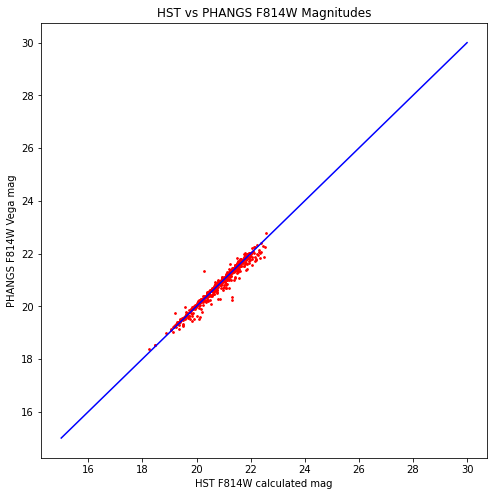

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(mag_814,cluster_data.PHANGS_F814W_VEGA,s=3,color='r')
plt.plot([15,30],[15,30],color='b')
plt.xlabel('HST F814W calculated mag')
plt.ylabel('PHANGS F814W Vega mag')
plt.title('HST vs PHANGS F814W Magnitudes')
plt.show()

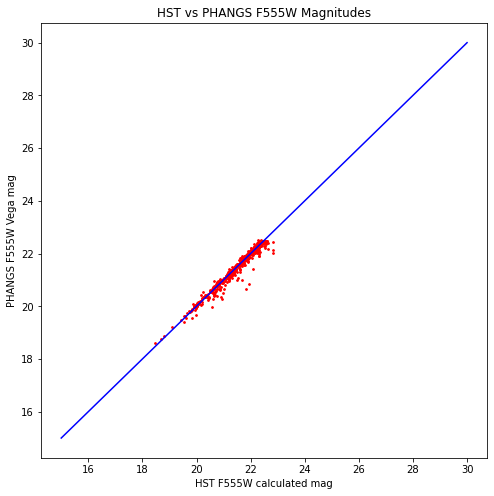

In [26]:
plt.figure(figsize=(8,8))
plt.scatter(mag_555,cluster_data.PHANGS_F555W_VEGA,s=3,color='r')
plt.plot([15,30],[15,30],color='b')
plt.xlabel('HST F555W calculated mag')
plt.ylabel('PHANGS F555W Vega mag')
plt.title('HST vs PHANGS F555W Magnitudes')
plt.show()

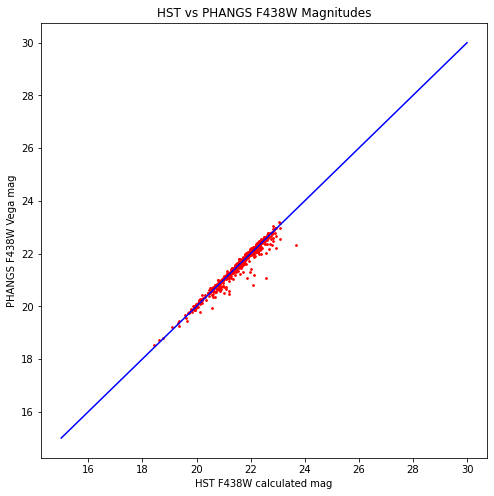

In [27]:
plt.figure(figsize=(8,8))
plt.scatter(mag_438,cluster_data.PHANGS_F438W_VEGA,s=3,color='r')
plt.plot([15,30],[15,30],color='b')
plt.xlabel('HST F438W calculated mag')
plt.ylabel('PHANGS F438W Vega mag')
plt.title('HST vs PHANGS F438W Magnitudes')
plt.show()

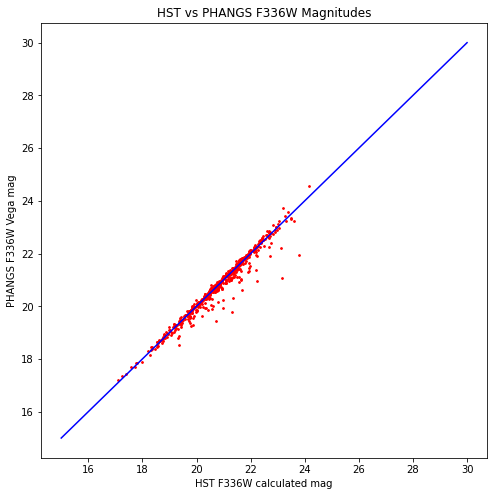

In [28]:
plt.figure(figsize=(8,8))
plt.scatter(mag_336,cluster_data.PHANGS_F336W_VEGA,s=3,color='r')
plt.plot([15,30],[15,30],color='b')
plt.xlabel('HST F336W calculated mag')
plt.ylabel('PHANGS F336W Vega mag')
plt.title('HST vs PHANGS F336W Magnitudes')
plt.show()

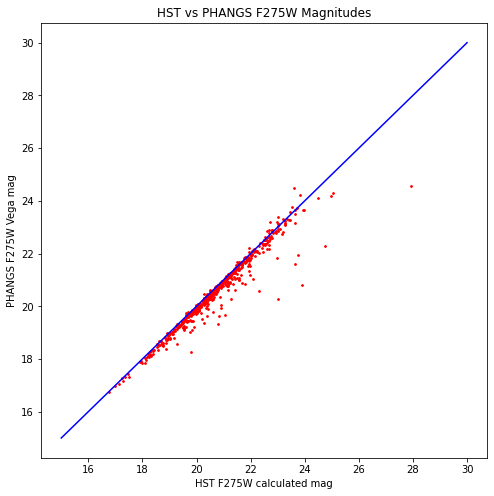

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(mag_275,cluster_data.PHANGS_F275W_VEGA,s=3,color='r')
plt.plot([15,30],[15,30],color='b')
plt.xlabel('HST F275W calculated mag')
plt.ylabel('PHANGS F275W Vega mag')
plt.title('HST vs PHANGS F275W Magnitudes')
plt.show()

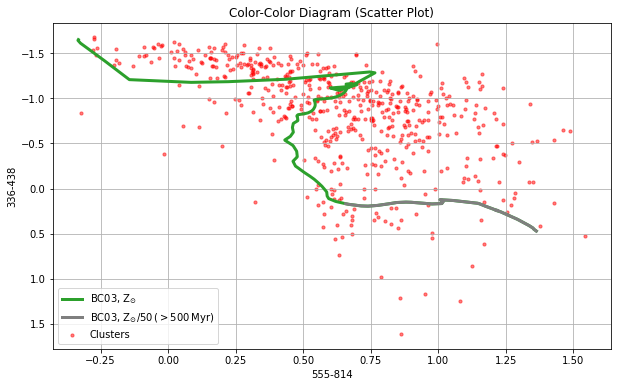

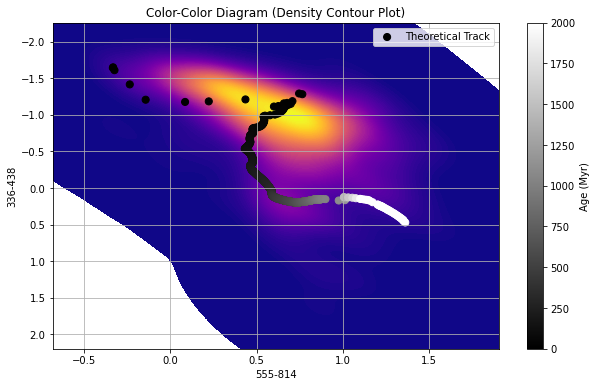

In [32]:
import seaborn as sns

# Load model data
model_ub_sol = np.load('model_ub_sol.npy')
model_vi_sol = np.load('model_vi_sol.npy')
age_mod_sol = np.load('age_mod_sol.npy')  # Assuming age is in millions of years (Myr)

# Calculate colors
color_336_438 = mag_336 - mag_438
color_555_814 = mag_555 - mag_814

# Scatter plot for (336-438) vs (555-814) with model data and age colorbar
plt.figure(figsize=(10, 6))
plt.plot(model_vi_sol, model_ub_sol, color='tab:green', linewidth=3, zorder=10, label=r'BC03, Z$_{\odot}$')
plt.plot(model_vi_sol[age_mod_sol>500], model_ub_sol[age_mod_sol>500], color='tab:gray', linewidth=3, zorder=10, label=r'BC03, Z$_{\odot}/50\,(> 500\,{\rm Myr})$')
sc = plt.scatter(color_555_814, color_336_438, s=10, c='red', alpha=0.5, label='Clusters')
plt.xlabel('555-814')
plt.ylabel('336-438')
plt.gca().invert_yaxis()  # Invert y-axis
plt.title('Color-Color Diagram (Scatter Plot)')
plt.legend()
plt.grid(True)
plt.show()

# Density contour plot for (336-438) vs (555-814) with model data and age colorbar
plt.figure(figsize=(10, 6))
sns.kdeplot(x=color_555_814, y=color_336_438, fill=True, cmap="plasma", thresh=0, levels=100)
sc = plt.scatter(model_vi_sol, model_ub_sol, c=age_mod_sol, vmin=0,vmax=2000, cmap='gray', s=50, label='Theoretical Track')
cbar = plt.colorbar(sc, label='Age (Myr)')
plt.xlabel('555-814')

plt.ylabel('336-438')
plt.gca().invert_yaxis()  # Invert y-axis
plt.title('Color-Color Diagram (Density Contour Plot)')
plt.legend()
plt.grid(True)
plt.show()


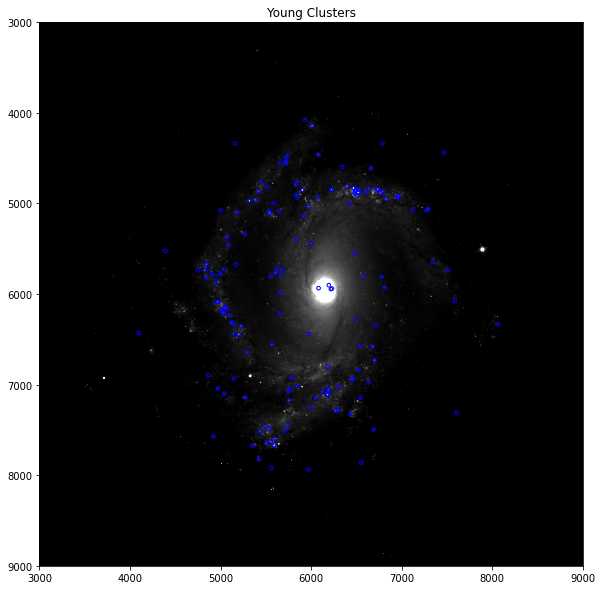

In [33]:
young_stars = []
for i in range(len(color_336_438)):
    if color_336_438[i] < -1.15 and color_555_814[i] <0.75:
        young_stars.append(positions_814[i])
young_stars = np.array(young_stars)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image5, vmin=0, vmax=1, cmap='gray')
ax.set_xlim(3000,9000)
ax.set_ylim(9000,3000)

# Add circles to the plot
for x, y in young_stars:
    circle = plt.Circle((x, y), radius=20, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.title('Young Clusters')
plt.show()

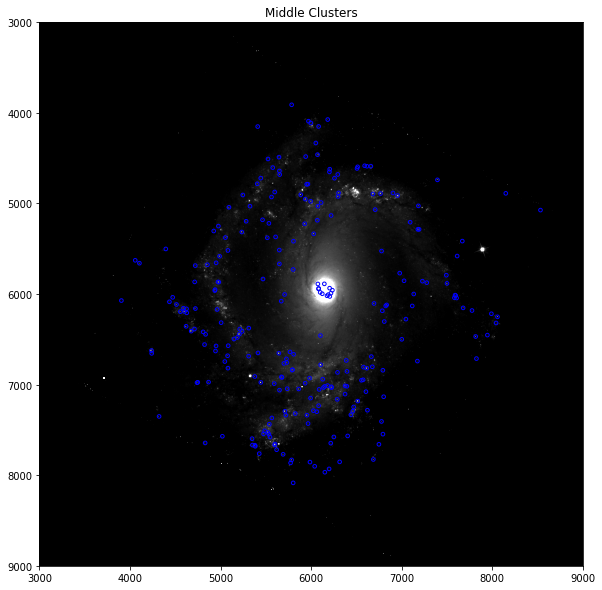

In [34]:
middle_stars = []
for i in range(len(color_336_438)):
    if (color_336_438[i] > -1.15 and color_336_438[i]<0.25) and (color_555_814[i] < 1 and color_555_814[i] > 0.4):
        middle_stars.append(positions_814[i])
middle_stars = np.array(middle_stars)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image5, vmin=0, vmax=1, cmap='gray')
ax.set_xlim(3000,9000)
ax.set_ylim(9000,3000)

# Add circles to the plot
for x, y in middle_stars:
    circle = plt.Circle((x, y), radius=20, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.title('Middle Clusters')
plt.show()

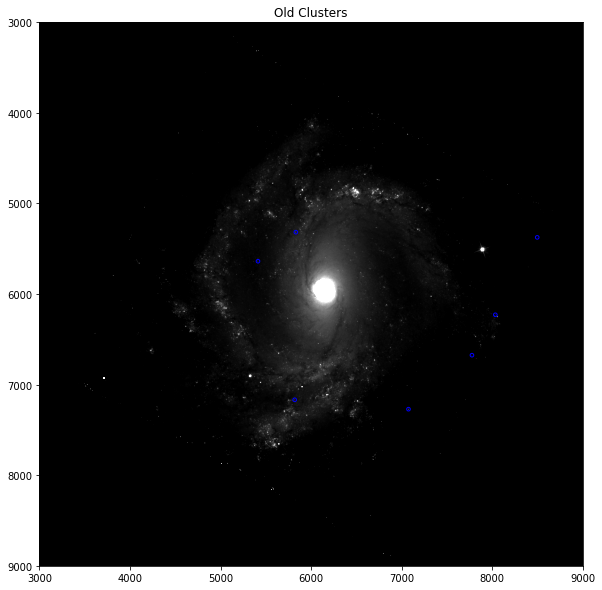

In [35]:
old_stars = []
for i in range(len(color_336_438)):
    if color_336_438[i] > 0.25 and color_555_814[i] > 1 :
        old_stars.append(positions_814[i])
old_stars = np.array(old_stars)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image5, vmin=0, vmax=1, cmap='gray')
ax.set_xlim(3000,9000)
ax.set_ylim(9000,3000)

# Add circles to the plot
for x, y in old_stars:
    circle = plt.Circle((x, y), radius=20, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.title('Old Clusters')
plt.show()

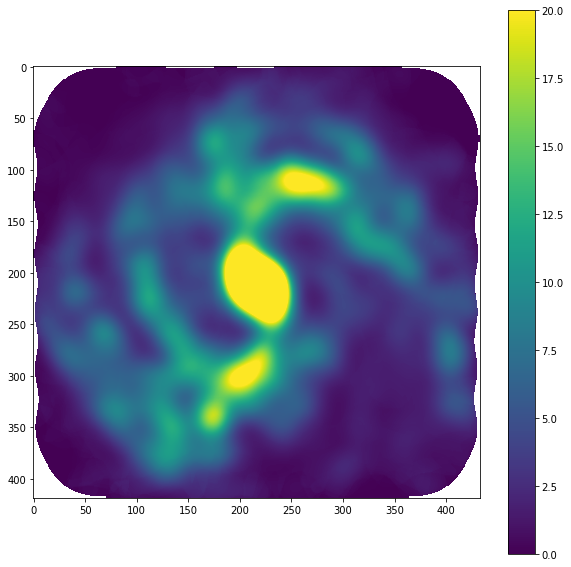

In [38]:
gas_dis = fits.open('gas.fits')
distribution = gas_dis[0].data
plt.figure(figsize=(10,10))
plt.imshow(distribution, vmax=20,vmin=0, cmap='viridis')
plt.colorbar()
plt.show()

In [39]:
gas_dis[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  433                                                  
NAXIS2  =                  419                                                  
BMAJ    = 0.003055555555555556                                                  
BMIN    = 0.003055555555555556                                                  
BPA     =                  0.0                                                  
BTYPE   = 'Moment0 '                                                            
OBJECT  = 'NGC4303 '                                                            
BUNIT   = 'K km s-1'           / Brightness (pixel) unit                        
ALTRVAL =   2.290655131135E+11 /Alternate frequency reference value             
ALTRPIX =  -3.500000000000E+

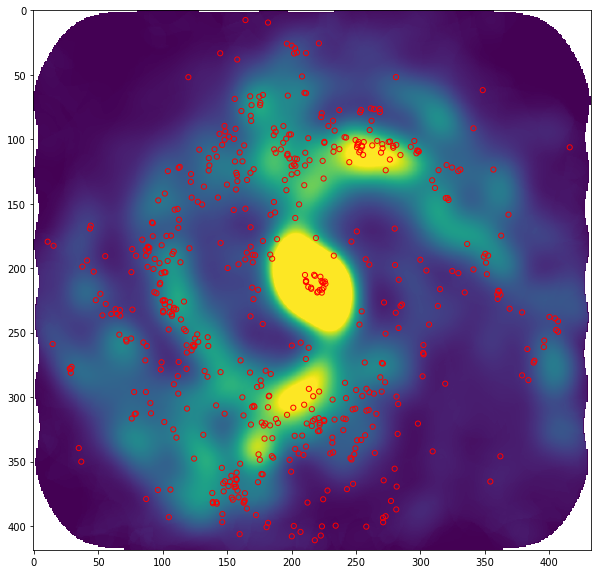

In [40]:
main_ra, main_dec = gas_dis[0].header['CRVAL1'], gas_dis[0].header['CRVAL2']
error_ra, error_dec = gas_dis[0].header['CDELT1'], gas_dis[0].header['CDELT2']
pixel1, pixel2 = gas_dis[0].header['CRPIX1'], gas_dis[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(cluster_data.PHANGS_RA), np.array(cluster_data.PHANGS_DEC)

# Calculate pixel coordinates
p1 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2 = pixel2 + (cluster_dec - main_dec) / error_dec
positions = np.array(list(zip(p1,p2)))
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(distribution, vmin=0, vmax=20, cmap='viridis')

# Add circles to the plot
for x, y in zip(p1,p2):
    circle = plt.Circle((x, y), radius=2, edgecolor='r', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.show()

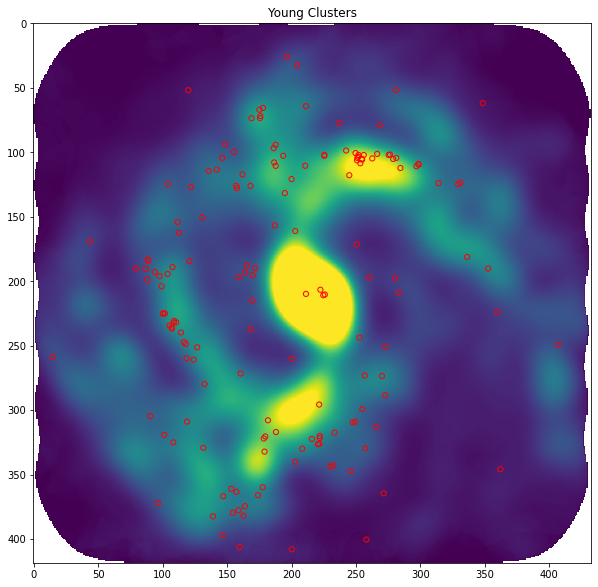

In [41]:
young_stars = []
for i in range(len(color_336_438)):
    if color_336_438[i] < -1.15 and color_555_814[i] <0.75:
        young_stars.append(positions[i])
young_stars = np.array(young_stars)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(distribution, vmin=0, vmax=20, cmap='viridis')

# Add circles to the plot
for x, y in young_stars:
    circle = plt.Circle((x, y), radius=2, edgecolor='r', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.title('Young Clusters')
plt.show()

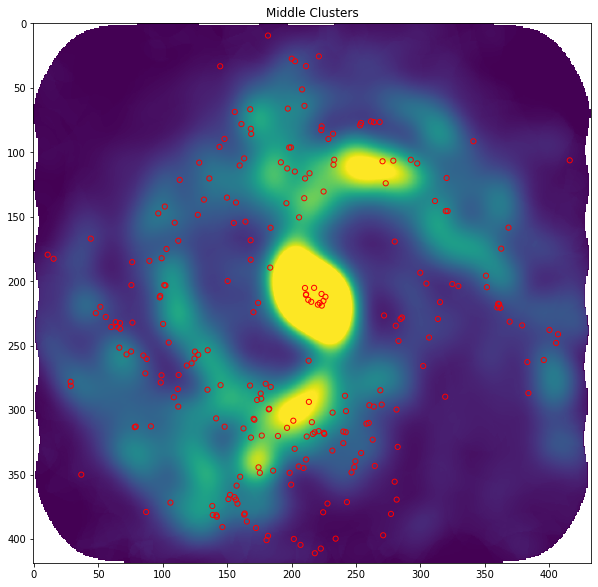

In [42]:
middle_stars = []
for i in range(len(color_336_438)):
    if (color_336_438[i] > -1.15 and color_336_438[i]<0.25) and (color_555_814[i] < 1 and color_555_814[i] > 0.4):
        middle_stars.append(positions[i])
middle_stars = np.array(middle_stars)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(distribution, vmin=0, vmax=20, cmap='viridis')

# Add circles to the plot
for x, y in middle_stars:
    circle = plt.Circle((x, y), radius=2, edgecolor='r', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.title('Middle Clusters')
plt.show()

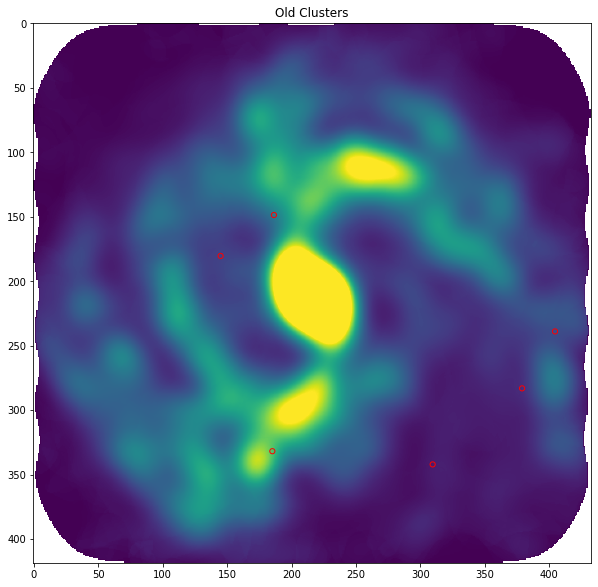

In [43]:
old_stars = []
for i in range(len(color_336_438)):
    if color_336_438[i] > 0.25 and color_555_814[i] > 1 :
        old_stars.append(positions[i])
old_stars = np.array(old_stars)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(distribution, vmin=0, vmax=20, cmap='viridis')

# Add circles to the plot
for x, y in old_stars:
    circle = plt.Circle((x, y), radius=2, edgecolor='r', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.title('Old Clusters')
plt.show()

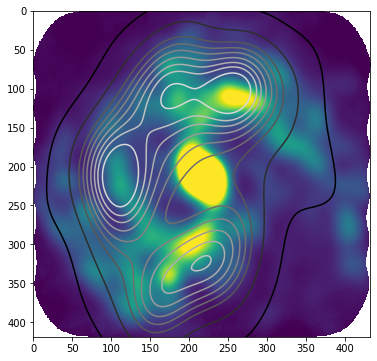

In [44]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot on the background
ax.imshow(distribution, vmax=20,vmin=0,cmap='viridis')
ax.set_xlim(left=0)
ax.set_ylim(top=0)
# Density map overlay using seaborn's kdeplot
sns.kdeplot(x=young_stars[:, 0], y=young_stars[:, 1], cmap='gray', fill=False, ax=ax, label='Density Map')

# Show plot
plt.show()


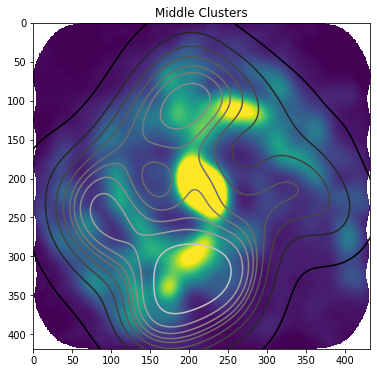

In [45]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot on the background
ax.imshow(distribution, vmax=20,vmin=0,cmap='viridis')
ax.set_xlim(left=0)
ax.set_ylim(top=0)
# Density map overlay using seaborn's kdeplot
sns.kdeplot(x=middle_stars[:, 0], y=middle_stars[:, 1], cmap='gray', fill=False, ax=ax, label='Density Map')
# Customize labels and title
ax.set_title('Middle Clusters')

# Show plot
plt.show()

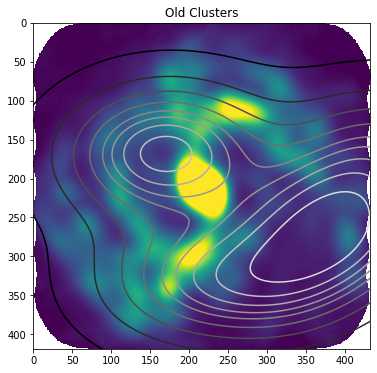

In [46]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot on the background
ax.imshow(distribution, vmax=20,vmin=0,cmap='viridis')
ax.set_xlim(left=0)
ax.set_ylim(top=0)
# Density map overlay using seaborn's kdeplot

sns.kdeplot(x=old_stars[:, 0], y=old_stars[:, 1], cmap='gray', fill=False, ax=ax, label='Density Map')
# Customize labels and title
ax.set_title('Old Clusters')

# Show plot
plt.show()

In [91]:
from scipy.stats import gaussian_kde

# Assuming young_stars and positions are numpy arrays
kde = gaussian_kde(young_stars.T)
den = kde(young_stars.T)

density = np.zeros(len(positions))

# Create a dictionary to map positions to densities
position_density_map = {tuple(young_stars[j]): den[j] for j in range(len(young_stars))}

for i in range(len(positions)):
    pos_tuple = tuple(positions[i])
    if pos_tuple in position_density_map:
        density[i] = position_density_map[pos_tuple]

print(density)


[0.00000000e+00 0.00000000e+00 0.00000000e+00 5.77649696e-06
 0.00000000e+00 0.00000000e+00 6.58301848e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.10473893e-06 3.23810403e-06 2.01414723e-06 0.00000000e+00
 1.12463493e-05 1.17167826e-05 0.00000000e+00 0.00000000e+00
 1.17790448e-05 0.00000000e+00 1.25369118e-05 1.27554099e-05
 1.23109092e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.38637091e-05 0.00000000e+00 1.43194631e-05
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.22445340e-05
 1.50300421e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.51806093e-05 0.00000000e+00 0.00000000e+00 1.66621833e-05
 0.00000000e+00 0.00000000e+00 1.36837492e-05 0.00000000e+00
 1.70881475e-05 1.66041964e-05 0.00000000e+00 1.53264543e-05
 1.56241264e-05 1.550013

In [92]:
from scipy.stats import pearsonr

def compute_2d_correlation(gas_density, cluster_density):
    # Flatten the arrays to compute the correlation
    gas_density_flat = gas_density.flatten()
    cluster_density_flat = cluster_density.flatten()
    
    correlation, _ = pearsonr(gas_density_flat, cluster_density_flat)
    return correlation

correlation_age_group_1 = compute_2d_correlation(distribution, density)


print(f'2D Correlation (Age Group 1): {correlation_age_group_1}')



ValueError: x and y must have the same length.

Class C1

In [73]:
human_C1 = cluster_data[cluster_data['PHANGS_CLUSTER_CLASS_HUMAN']== 1.0]
human_C1

,INDEX,ID_PHANGS_CLUSTER,ID_PHANGS_CANDIDATE,ID_PHANGS_ALLSOURCES,PHANGS_X,PHANGS_Y,PHANGS_RA,PHANGS_DEC,PHANGS_CLUSTER_CLASS_HUMAN,PHANGS_CLUSTER_CLASS_ML_VGG,...,PHANGS_F438W_mJy,PHANGS_F438W_mJy_ERR,PHANGS_F555W_mJy,PHANGS_F555W_mJy_TOT_ERR,PHANGS_F814W_mJy,PHANGS_F814W_mJy_TOT_ERR,PHANGS_NON_DETECTION_FLAG,PHANGS_NO_COVERAGE_FLAG,PHANGS_CI,CC_CLASS
1,2,12,38,743,5783.77,3910.52,185.482872,4.451237,1.0,1,...,0.010185,0.000119,0.009845,0.000100,0.013023,0.000150,0.0,0.0,1.570525,b'map'
2,3,46,112,1971,6182.15,4073.37,185.478474,4.453030,1.0,1,...,0.006294,0.000109,0.007024,0.000088,0.009419,0.000138,0.0,0.0,1.734482,b'map'
3,4,49,116,384,5931.47,4075.65,185.481241,4.453055,1.0,2,...,0.013621,0.000251,0.011502,0.000250,0.009621,0.000241,0.0,0.0,1.356492,b'ycl'
6,7,99,200,123,6011.15,4144.41,185.480362,4.453811,1.0,2,...,0.073327,0.000465,0.060085,0.000381,0.041937,0.000450,0.0,0.0,1.490892,b'ycl'
7,8,101,207,921,6081.60,4149.71,185.479584,4.453870,1.0,1,...,0.010957,0.000146,0.010308,0.000115,0.012106,0.000155,0.0,0.0,1.597692,b'outside'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,553,5653,9846,306,6197.27,7929.62,185.478307,4.495470,1.0,1,...,0.018543,0.000145,0.016195,0.000108,0.019044,0.000155,0.0,0.0,1.519470,b'map'
553,554,5656,9855,1516,5970.09,7935.29,185.480815,4.495532,1.0,2,...,0.006449,0.000144,0.005540,0.000120,0.004085,0.000133,0.0,0.0,1.424178,b'ycl'
554,555,5668,9882,2437,6150.40,7966.12,185.478825,4.495872,1.0,2,...,0.005395,0.000110,0.004756,0.000080,0.004892,0.000109,0.0,0.0,1.519461,b'map'
555,556,5701,9954,3381,5800.85,8083.69,185.482683,4.497165,1.0,1,...,0.004054,0.000085,0.004158,0.000064,0.005071,0.000100,0.0,0.0,1.632642,b'map'


In [74]:
main_ra, main_dec = hdul1[0].header['CRVAL1'], hdul1[0].header['CRVAL2']
error_ra, error_dec = hdul1[0].header['CD1_1'], hdul1[0].header['CD2_2']
pixel1, pixel2 = hdul1[0].header['CRPIX1'], hdul1[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(human_C1.PHANGS_RA), np.array(human_C1.PHANGS_DEC)

# Calculate pixel coordinates
p1_275 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_275 = pixel2 + (cluster_dec - main_dec) / error_dec

In [75]:
main_ra, main_dec = hdul2[0].header['CRVAL1'], hdul2[0].header['CRVAL2']
error_ra, error_dec = hdul2[0].header['CD1_1'], hdul2[0].header['CD2_2']
pixel1, pixel2 = hdul2[0].header['CRPIX1'], hdul2[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(human_C1.PHANGS_RA), np.array(human_C1.PHANGS_DEC)

# Calculate pixel coordinates
p1_336 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_336 = pixel2 + (cluster_dec - main_dec) / error_dec

In [76]:
main_ra, main_dec = hdul3[0].header['CRVAL1'], hdul3[0].header['CRVAL2']
error_ra, error_dec = hdul3[0].header['CD1_1'], hdul3[0].header['CD2_2']
pixel1, pixel2 = hdul3[0].header['CRPIX1'], hdul3[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(human_C1.PHANGS_RA), np.array(human_C1.PHANGS_DEC)

# Calculate pixel coordinates
p1_438 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_438 = pixel2 + (cluster_dec - main_dec) / error_dec

In [77]:
main_ra, main_dec = hdul4[0].header['CRVAL1'], hdul4[0].header['CRVAL2']
error_ra, error_dec = hdul4[0].header['CD1_1'], hdul4[0].header['CD2_2']
pixel1, pixel2 = hdul4[0].header['CRPIX1'], hdul4[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(human_C1.PHANGS_RA), np.array(human_C1.PHANGS_DEC)

# Calculate pixel coordinates
p1_555 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_555 = pixel2 + (cluster_dec - main_dec) / error_dec

In [78]:
main_ra, main_dec = hdul5[0].header['CRVAL1'], hdul5[0].header['CRVAL2']
error_ra, error_dec = hdul5[0].header['CD1_1'], hdul5[0].header['CD2_2']
pixel1, pixel2 = hdul5[0].header['CRPIX1'], hdul5[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(human_C1.PHANGS_RA), np.array(human_C1.PHANGS_DEC)

# Calculate pixel coordinates
p1_814 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_814 = pixel2 + (cluster_dec - main_dec) / error_dec

In [79]:
# Create a list of positions from p1 and p2
positions_814 = list(zip(p1_814, p2_814))
positions_555 = list(zip(p1_555, p2_555))
positions_438 = list(zip(p1_438, p2_438))
positions_336 = list(zip(p1_336, p2_336))
positions_275 = list(zip(p1_275, p2_275))

phot_table_814 = calculate_aperture_photometry(image5,positions_814,4,(7,8))
phot_table_555= calculate_aperture_photometry(image4,positions_555,4,(7,8))
phot_table_438= calculate_aperture_photometry(image3,positions_438,4,(7,8))
phot_table_336= calculate_aperture_photometry(image2,positions_336,4,(7,8))
phot_table_275= calculate_aperture_photometry(image1,positions_275,4,(7,8))

In [80]:
mag_814 = -2.5*np.log10(phot_table_814['aperture_sum_bkgsub']*hdul5[0].header['PHOTFNU'])+8.7-0.392-0.0329-0.86
mag_555 = -2.5*np.log10(phot_table_555['aperture_sum_bkgsub']*hdul4[0].header['PHOTFNU'])+8.7+0.048-0.0618-0.74
mag_438 = -2.5*np.log10(phot_table_438['aperture_sum_bkgsub']*hdul3[0].header['PHOTFNU'])+8.7+0.178-0.0798-0.77
mag_336 = -2.5*np.log10(phot_table_336['aperture_sum_bkgsub']*hdul2[0].header['PHOTFNU'])+8.7-1.158-0.0979-0.86
mag_275 = -2.5*np.log10(phot_table_275['aperture_sum_bkgsub']*hdul1[0].header['PHOTFNU'])+8.7-1.4-0.121-0.93

<ipython-input-80-f952a40d6089>:4: RuntimeWarning: invalid value encountered in log10
  mag_336 = -2.5*np.log10(phot_table_336['aperture_sum_bkgsub']*hdul2[0].header['PHOTFNU'])+8.7-1.158-0.0979-0.86
<ipython-input-80-f952a40d6089>:5: RuntimeWarning: invalid value encountered in log10
  mag_275 = -2.5*np.log10(phot_table_275['aperture_sum_bkgsub']*hdul1[0].header['PHOTFNU'])+8.7-1.4-0.121-0.93


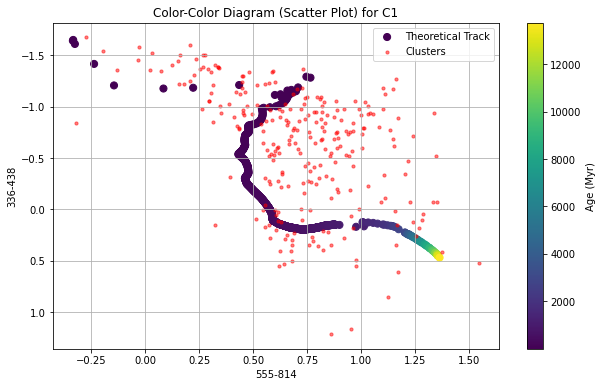

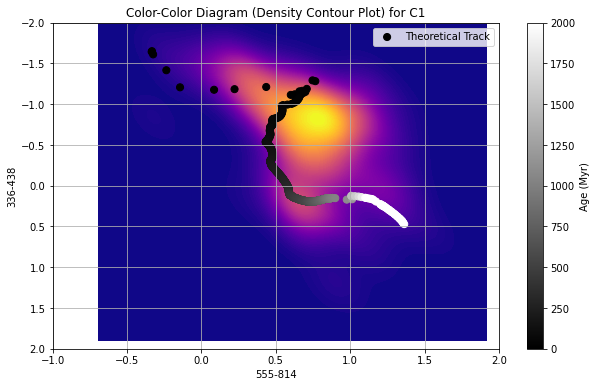

In [81]:
import seaborn as sns

# Load model data
model_ub_sol = np.load('model_ub_sol.npy')
model_vi_sol = np.load('model_vi_sol.npy')
age_mod_sol = np.load('age_mod_sol.npy')  # Assuming age is in millions of years (Myr)

# Calculate colors
color_336_438 = mag_336 - mag_438
color_555_814 = mag_555 - mag_814

# Scatter plot for (336-438) vs (555-814) with model data and age colorbar
plt.figure(figsize=(10, 6))
sc = plt.scatter(model_vi_sol, model_ub_sol, c=age_mod_sol, cmap='viridis', s=50, label='Theoretical Track')
plt.scatter(color_555_814, color_336_438, s=10, c='red', alpha=0.5, label='Clusters')
cbar = plt.colorbar(sc, label='Age (Myr)')
plt.xlabel('555-814')
plt.ylabel('336-438')
plt.gca().invert_yaxis()  # Invert y-axis
plt.title('Color-Color Diagram (Scatter Plot) for C1')
plt.legend()
plt.grid(True)
plt.show()

# Density contour plot for (336-438) vs (555-814) with model data and age colorbar
plt.figure(figsize=(10, 6))
sns.kdeplot(x=color_555_814, y=color_336_438, fill=True, cmap="plasma", thresh=0, levels=100)
sc = plt.scatter(model_vi_sol, model_ub_sol, c=age_mod_sol,vmin=0, vmax=2000, cmap='gray', s=50, label='Theoretical Track')
cbar = plt.colorbar(sc, label='Age (Myr)')
plt.xlabel('555-814')
plt.xlim(-1,2)
plt.ylim(-2,2)
plt.ylabel('336-438')
plt.gca().invert_yaxis()  # Invert y-axis
plt.title('Color-Color Diagram (Density Contour Plot) for C1')
plt.legend()
plt.grid(True)
plt.show()


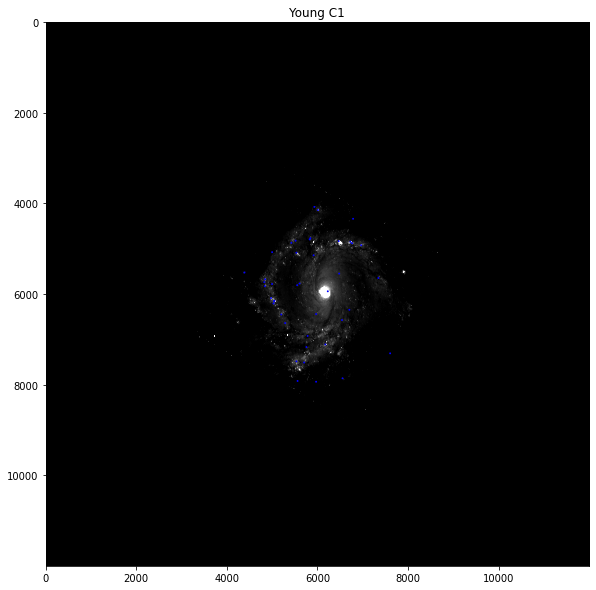

In [57]:
young_stars = []
for i in range(len(color_336_438)):
    if color_336_438[i] < -1.15 and color_555_814[i] <0.75:
        young_stars.append(positions_814[i])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image4, vmin=0, vmax=1, cmap='gray')

# Add circles to the plot
for x, y in young_stars:
    circle = plt.Circle((x, y), radius=10, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.title('Young C1')
plt.show()

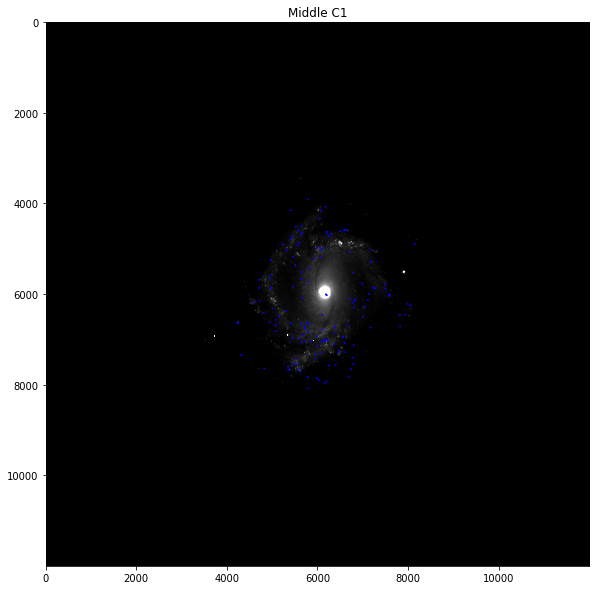

In [58]:
middle_stars = []
for i in range(len(color_336_438)):
    if (color_336_438[i] > -1.15 and color_336_438[i]<0.25) and (color_555_814[i] < 1 and color_555_814[i] > 0.4):
        middle_stars.append(positions_814[i])
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image5, vmin=0, vmax=1, cmap='gray')

# Add circles to the plot
for x, y in middle_stars:
    circle = plt.Circle((x, y), radius=10, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.title('Middle C1')
plt.show()

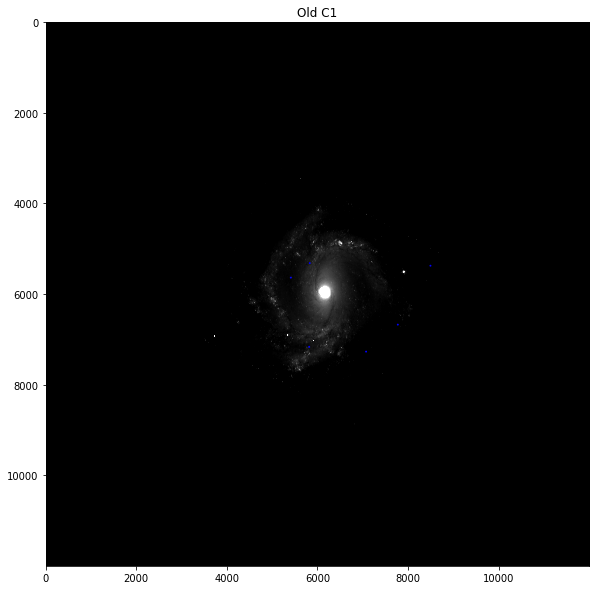

In [59]:
old_stars = []
for i in range(len(color_336_438)):
    if color_336_438[i] > 0.25 and color_555_814[i] > 1 :
        old_stars.append(positions_814[i])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image5, vmin=0, vmax=1, cmap='gray')

# Add circles to the plot
for x, y in old_stars:
    circle = plt.Circle((x, y), radius=10, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.title('Old C1')
plt.show()

# Class C2

In [82]:
human_C2 = cluster_data[cluster_data['PHANGS_CLUSTER_CLASS_HUMAN']== 2.0]
human_C2

,INDEX,ID_PHANGS_CLUSTER,ID_PHANGS_CANDIDATE,ID_PHANGS_ALLSOURCES,PHANGS_X,PHANGS_Y,PHANGS_RA,PHANGS_DEC,PHANGS_CLUSTER_CLASS_HUMAN,PHANGS_CLUSTER_CLASS_ML_VGG,...,PHANGS_F438W_mJy,PHANGS_F438W_mJy_ERR,PHANGS_F555W_mJy,PHANGS_F555W_mJy_TOT_ERR,PHANGS_F814W_mJy,PHANGS_F814W_mJy_TOT_ERR,PHANGS_NON_DETECTION_FLAG,PHANGS_NO_COVERAGE_FLAG,PHANGS_CI,CC_CLASS
0,1,10,32,3337,5607.12,3890.82,185.484822,4.451021,2.0,2,...,0.004291,0.000092,0.003992,0.000068,0.003779,0.000100,0.0,0.0,1.559774,b'outside'
4,5,65,140,3665,5969.67,4091.58,185.480820,4.453230,2.0,2,...,0.005205,0.000123,0.005190,0.000110,0.007004,0.000166,0.0,0.0,1.656629,b'map'
5,6,73,156,1968,5995.68,4111.24,185.480533,4.453446,2.0,2,...,0.005286,0.000159,0.005341,0.000136,0.006380,0.000178,0.0,0.0,1.628992,b'ycl'
9,10,106,215,884,5987.58,4152.78,185.480622,4.453904,2.0,3,...,0.005644,0.000225,0.008544,0.000188,0.016138,0.000236,0.0,0.0,1.474998,b'outside'
13,14,195,368,2451,5159.74,4338.53,185.489760,4.455948,2.0,2,...,0.007795,0.000106,0.006339,0.000079,0.004124,0.000107,0.0,0.0,1.552091,b'ycl'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,540,5487,9541,1055,6705.27,7777.81,185.472699,4.493799,2.0,2,...,0.008172,0.000163,0.007940,0.000146,0.013832,0.000281,0.0,0.0,1.695579,b'outside'
542,543,5555,9660,288,5425.36,7824.46,185.486829,4.494312,2.0,2,...,0.021539,0.000365,0.019999,0.000345,0.020667,0.000267,0.0,0.0,1.554430,b'ycl'
545,546,5589,9718,2136,6313.74,7851.91,185.477021,4.494615,2.0,2,...,0.006045,0.000098,0.005894,0.000073,0.007499,0.000112,0.0,0.0,1.731434,b'outside'
547,548,5597,9731,1615,6206.33,7857.33,185.478207,4.494674,2.0,2,...,0.006441,0.000112,0.005388,0.000093,0.004569,0.000117,0.0,0.0,1.391341,b'outside'


In [83]:
main_ra, main_dec = hdul1[0].header['CRVAL1'], hdul1[0].header['CRVAL2']
error_ra, error_dec = hdul1[0].header['CD1_1'], hdul1[0].header['CD2_2']
pixel1, pixel2 = hdul1[0].header['CRPIX1'], hdul1[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(human_C2.PHANGS_RA), np.array(human_C2.PHANGS_DEC)

# Calculate pixel coordinates
p1_275 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_275 = pixel2 + (cluster_dec - main_dec) / error_dec

In [84]:
main_ra, main_dec = hdul2[0].header['CRVAL1'], hdul2[0].header['CRVAL2']
error_ra, error_dec = hdul2[0].header['CD1_1'], hdul2[0].header['CD2_2']
pixel1, pixel2 = hdul2[0].header['CRPIX1'], hdul2[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(human_C2.PHANGS_RA), np.array(human_C2.PHANGS_DEC)

# Calculate pixel coordinates
p1_336 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_336 = pixel2 + (cluster_dec - main_dec) / error_dec

In [85]:
main_ra, main_dec = hdul3[0].header['CRVAL1'], hdul3[0].header['CRVAL2']
error_ra, error_dec = hdul3[0].header['CD1_1'], hdul3[0].header['CD2_2']
pixel1, pixel2 = hdul3[0].header['CRPIX1'], hdul3[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(human_C2.PHANGS_RA), np.array(human_C2.PHANGS_DEC)

# Calculate pixel coordinates
p1_438 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_438 = pixel2 + (cluster_dec - main_dec) / error_dec

In [86]:
main_ra, main_dec = hdul4[0].header['CRVAL1'], hdul4[0].header['CRVAL2']
error_ra, error_dec = hdul4[0].header['CD1_1'], hdul4[0].header['CD2_2']
pixel1, pixel2 = hdul4[0].header['CRPIX1'], hdul4[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(human_C2.PHANGS_RA), np.array(human_C2.PHANGS_DEC)

# Calculate pixel coordinates
p1_555 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_555 = pixel2 + (cluster_dec - main_dec) / error_dec

In [87]:
main_ra, main_dec = hdul5[0].header['CRVAL1'], hdul5[0].header['CRVAL2']
error_ra, error_dec = hdul5[0].header['CD1_1'], hdul5[0].header['CD2_2']
pixel1, pixel2 = hdul5[0].header['CRPIX1'], hdul5[0].header['CRPIX2']

# Convert cluster data to numpy arrays
cluster_ra, cluster_dec = np.array(human_C2.PHANGS_RA), np.array(human_C2.PHANGS_DEC)

# Calculate pixel coordinates
p1_814 = pixel1 + (cluster_ra - main_ra) * np.cos(np.deg2rad(main_dec)) / error_ra
p2_814 = pixel2 + (cluster_dec - main_dec) / error_dec

In [88]:
# Create a list of positions from p1 and p2
positions_814 = list(zip(p1_814, p2_814))
positions_555 = list(zip(p1_555, p2_555))
positions_438 = list(zip(p1_438, p2_438))
positions_336 = list(zip(p1_336, p2_336))
positions_275 = list(zip(p1_275, p2_275))

phot_table_814 = calculate_aperture_photometry(image5,positions_814,4,(7,8))
phot_table_555= calculate_aperture_photometry(image4,positions_555,4,(7,8))
phot_table_438= calculate_aperture_photometry(image3,positions_438,4,(7,8))
phot_table_336= calculate_aperture_photometry(image2,positions_336,4,(7,8))
phot_table_275= calculate_aperture_photometry(image1,positions_275,4,(7,8))

In [89]:
mag_814 = -2.5*np.log10(phot_table_814['aperture_sum_bkgsub']*hdul5[0].header['PHOTFNU'])+8.7-0.392-0.0329-0.86
mag_555 = -2.5*np.log10(phot_table_555['aperture_sum_bkgsub']*hdul4[0].header['PHOTFNU'])+8.7+0.048-0.0618-0.74
mag_438 = -2.5*np.log10(phot_table_438['aperture_sum_bkgsub']*hdul3[0].header['PHOTFNU'])+8.7+0.178-0.0798-0.77
mag_336 = -2.5*np.log10(phot_table_336['aperture_sum_bkgsub']*hdul2[0].header['PHOTFNU'])+8.7-1.158-0.0979-0.86
mag_275 = -2.5*np.log10(phot_table_275['aperture_sum_bkgsub']*hdul1[0].header['PHOTFNU'])+8.7-1.4-0.121-0.93

<ipython-input-89-f952a40d6089>:5: RuntimeWarning: invalid value encountered in log10
  mag_275 = -2.5*np.log10(phot_table_275['aperture_sum_bkgsub']*hdul1[0].header['PHOTFNU'])+8.7-1.4-0.121-0.93


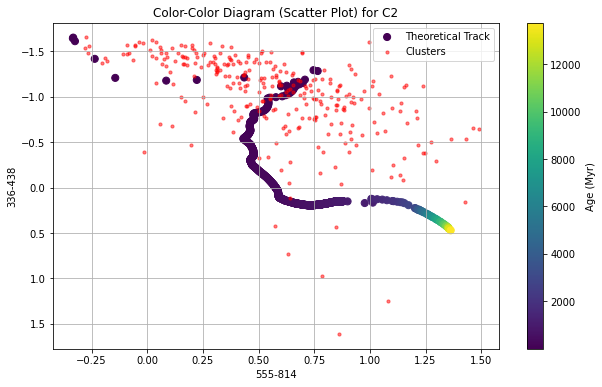

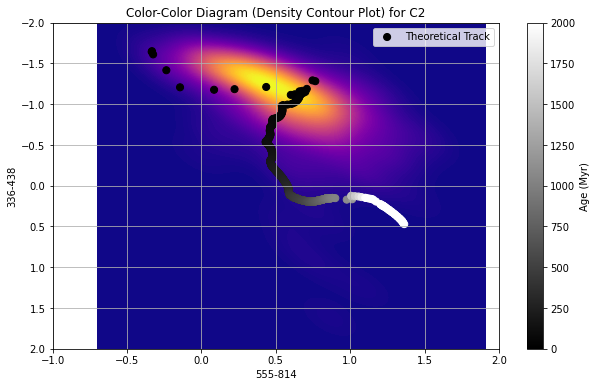

In [90]:
import seaborn as sns

# Load model data
model_ub_sol = np.load('model_ub_sol.npy')
model_vi_sol = np.load('model_vi_sol.npy')
age_mod_sol = np.load('age_mod_sol.npy')  # Assuming age is in millions of years (Myr)

# Calculate colors
color_336_438 = mag_336 - mag_438
color_555_814 = mag_555 - mag_814

# Scatter plot for (336-438) vs (555-814) with model data and age colorbar
plt.figure(figsize=(10, 6))
sc = plt.scatter(model_vi_sol, model_ub_sol, c=age_mod_sol, cmap='viridis', s=50, label='Theoretical Track')
plt.scatter(color_555_814, color_336_438, s=10, c='red', alpha=0.5, label='Clusters')
cbar = plt.colorbar(sc, label='Age (Myr)')
plt.xlabel('555-814')
plt.ylabel('336-438')
plt.gca().invert_yaxis()  # Invert y-axis
plt.title('Color-Color Diagram (Scatter Plot) for C2')
plt.legend()
plt.grid(True)
plt.show()

# Density contour plot for (336-438) vs (555-814) with model data and age colorbar
plt.figure(figsize=(10, 6))
sns.kdeplot(x=color_555_814, y=color_336_438, fill=True, cmap="plasma", thresh=0, levels=100)
sc = plt.scatter(model_vi_sol, model_ub_sol, c=age_mod_sol, vmin=0, vmax=2000, cmap='gray', s=50, label='Theoretical Track')
cbar = plt.colorbar(sc, label='Age (Myr)')
plt.xlabel('555-814')
plt.xlim(-1,2)
plt.ylim(-2,2)
plt.ylabel('336-438')
plt.gca().invert_yaxis()  # Invert y-axis
plt.title('Color-Color Diagram (Density Contour Plot) for C2')
plt.legend()
plt.grid(True)
plt.show()


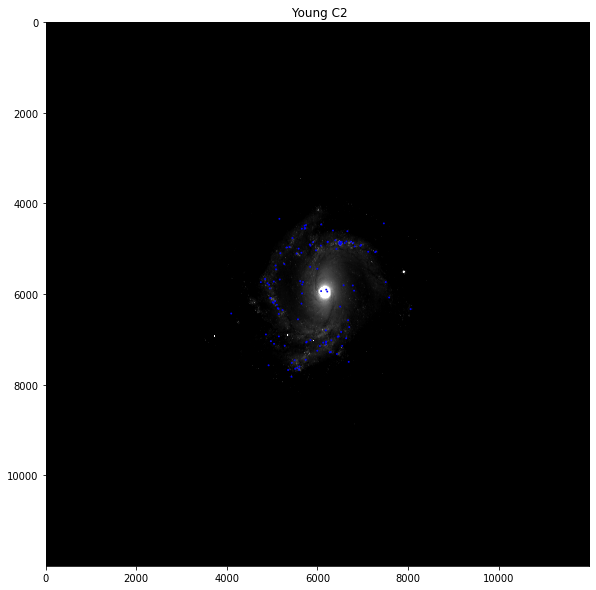

In [69]:
young_stars = []
for i in range(len(color_336_438)):
    if color_336_438[i] < -1.15 and color_555_814[i] <0.75:
        young_stars.append(positions_814[i])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image5, vmin=0, vmax=1, cmap='gray')

# Add circles to the plot
for x, y in young_stars:
    circle = plt.Circle((x, y), radius=10, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.title(' Young C2')
plt.show()

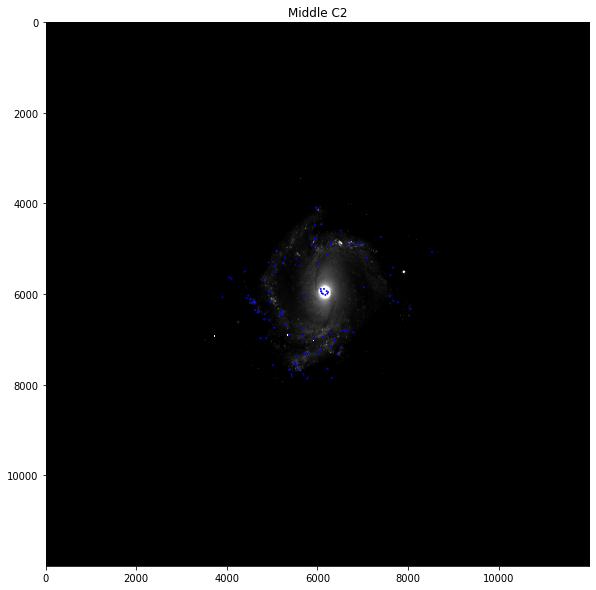

In [70]:
middle_stars = []
for i in range(len(color_336_438)):
    if (color_336_438[i] > -1.15 and color_336_438[i]<0.25) and (color_555_814[i] < 1 and color_555_814[i] > 0.4):
        middle_stars.append(positions_814[i])
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image5, vmin=0, vmax=1, cmap='gray')

# Add circles to the plot
for x, y in middle_stars:
    circle = plt.Circle((x, y), radius=10, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.title('Middle C2')
plt.show()

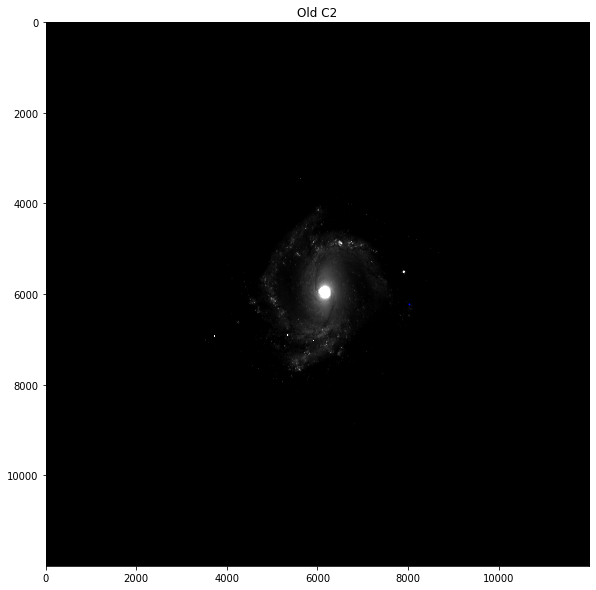

In [71]:
old_stars = []
for i in range(len(color_336_438)):
    if color_336_438[i] > 0.25 and color_555_814[i] > 1 :
        old_stars.append(positions_814[i])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Display the image
ax.imshow(image5, vmin=0, vmax=1, cmap='gray')

# Add circles to the plot
for x, y in old_stars:
    circle = plt.Circle((x, y), radius=10, edgecolor='b', facecolor='None')
    ax.add_artist(circle)

# Show the plot
plt.title('Old C2')
plt.show()

C1 has more middle clusters stars compared to C2, which has more younger clusters.